In [9]:
import os
import pathlib
import pandas as pd
import re

import copy
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

import analysis
%load_ext autoreload
%autoreload 2

# Définir le répertoire racine où vous souhaitez chercher des fichiers .csv
root_directory = os.getcwd() + "/outputs/no_mask"
# root_directory = os.getcwd() + "/outputs/no_mask/2023-06-14/14-56-43/5"
# Créer une liste vide pour stocker tous les DataFrames des fichiers .csv trouvés
data_frames = []
conv_frames = []

# Parcourir tous les fichiers du répertoire racine et des sous-répertoires de manière récursive
if_break = False
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        # Vérifier si le fichier est un fichier .csv
        if file.endswith('reports.csv'):
            # Ouvrir le fichier .csv dans un DataFrame
            file_path = os.path.join(subdir, file)
            df = pd.read_csv(file_path, sep='\t')
            df["file_path"] = file_path
            # Ajouter le DataFrame à la listeZ

            for subdir_log, _, file_logs in os.walk(pathlib.Path(subdir).parent):
                for file_log in file_logs:
                    if file_log.endswith('.log'):
                        # Extract a, b, c from log file
                        file_path_log = os.path.join(subdir_log, file_log)
                        a, b, c = (analysis.get_paired_from_log(file_path_log))
                        # print(log_file.read())
                        df["num_data_points"] = a
                        df["num_data_per_local_update_step"] = b
                        df["num_local_updates"] = c

                        # Extract load round from log file
                        load_round = analysis.get_load_round_from_log(file_path_log)
                        df["load_round"] = load_round

                        # Extract Iterations, and Reconstruction Losses from log file
                        user, trials, it_rec_pairs_matches = analysis.get_iteration_and_rec_loss_from_log(file_path_log)
                        second_time = False
                        for it, _ in it_rec_pairs_matches:
                            df[f"it_{it}"] = None
                        trial = 0
                        max_it = max([it for it, _ in it_rec_pairs_matches])
                        for it, rec_loss in it_rec_pairs_matches:
                            df.loc[df.index == trial, f"it_{it}"] = rec_loss
                            if it == max_it:
                                trial += 1

                        # if_break = True
                        if if_break:
                            break
                if if_break:
                    break
            data_frames.append(df)
        elif file.endswith('convergence_results.csv'):
            file_path = os.path.join(subdir, file)
            df = pd.read_csv(file_path, sep='\t')
            df["file_path"] = file_path
            conv_frames.append(df)
        if if_break:
            break
    if if_break:
        break

# Fusionner tous les DataFrames en un seul DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)
conv_df = pd.concat(conv_frames, ignore_index=True)
path = "2023-06-22/14-53-34/0"
date = "2023-06-22"
hour = "14-53-34"
run = "0"
date_and_run = f"{date}/{hour}/{run}"
print(date_and_run)
filtered_conv_df = conv_df[conv_df["file_path"].str.contains(date_and_run)]

# Afficher le DataFrame résultant
print(merged_df.shape)
print(filtered_conv_df.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-06-22/14-53-34/0
(249, 81)
(12000, 5)


In [2]:
from omegaconf import OmegaConf

merged_df = analysis.get_cfg_from_df(merged_df)

In [65]:
merged_df["cfg"].str.contains("14-25-55")

array([False])

In [3]:
merged_df.columns

Index(['name', 'usecase', 'model', 'datapoints', 'model_state', 'attack',
       'attacktype', 'mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'min_mse',
       'max_mse', 'max_psnr', 'max_lpips', 'max_ssim', 'max_rpsnr', 'IIP-none',
       'feat_mse', 'parameters', 'label_acc', 'queries', 'score', 'total_time',
       'user_type', 'gradient_noise', 'seed', 'ATK_type', 'ATK_attack_type',
       'ATK_label_strategy', 'ATK_text_strategy', 'ATK_token_recovery',
       'ATK_objective', 'ATK_restarts', 'ATK_init', 'ATK_normalize_gradients',
       'ATK_optim', 'ATK_augmentations', 'ATK_differentiable_augmentations',
       'ATK_regularization', 'ATK_impl', 'data', 'impl', 'server', 'user',
       'num_queries', 'folder', 'file_path', 'num_data_points',
       'num_data_per_local_update_step', 'num_local_updates', 'load_round',
       'it_1', 'it_101', 'it_201', 'it_301', 'it_401', 'it_501', 'it_601',
       'it_701', 'it_801', 'it_901', 'it_1001', 'it_1101', 'it_1201',
       'it_1301', 'it_1401',

In [43]:
filtered_conv_df

,restart_trial,user_idx,step,Trial_0_Val,file_path
103200,0,0,0,4.596194,/volatile/home/pj273170/Code/Breaching/breachi...
103201,0,0,1,3.396253,/volatile/home/pj273170/Code/Breaching/breachi...
103202,0,0,2,2.333208,/volatile/home/pj273170/Code/Breaching/breachi...
103203,0,0,3,1.840391,/volatile/home/pj273170/Code/Breaching/breachi...
103204,0,0,4,1.518079,/volatile/home/pj273170/Code/Breaching/breachi...
...,...,...,...,...,...
115195,0,4,2395,0.068334,/volatile/home/pj273170/Code/Breaching/breachi...
115196,0,4,2396,0.069611,/volatile/home/pj273170/Code/Breaching/breachi...
115197,0,4,2397,0.070940,/volatile/home/pj273170/Code/Breaching/breachi...
115198,0,4,2398,0.071352,/volatile/home/pj273170/Code/Breaching/breachi...


[100]


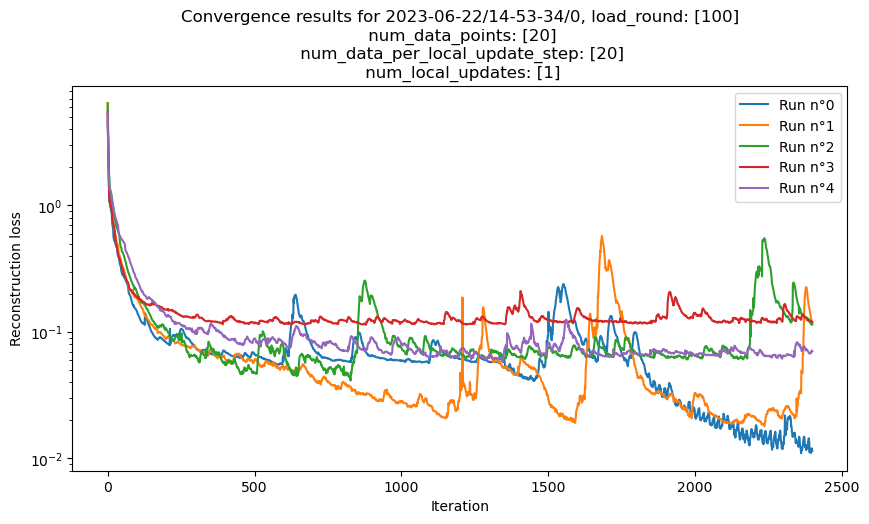

In [39]:
analysis.plot_conv_df(conv_df, date_and_run, merged_df)

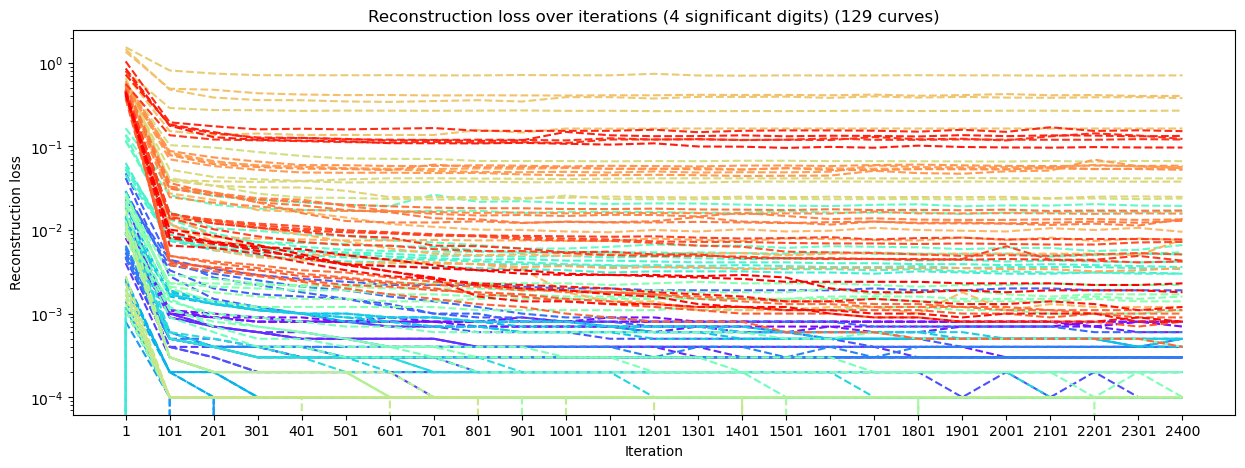

In [70]:
filtered_df = merged_df#.loc[(merged_df["num_local_updates"] == 5)]
analysis.plot_reconstruction_loss_from_df(filtered_df)
# print(reconstruction_loss)
# for i in range(len(reconstruction_loss)):
#     plt.plot(iter_values, reconstruction_loss[i], label=f"trial {i}")


In [4]:
print(merged_df.columns)
for col in merged_df.columns:
    print(f"{col:<20}, {merged_df[col].loc[0]}")
# print(merged_df["ATK_optim"].loc[0])
# print(merged_df["ATK_objective"].loc[0])
# print(merged_df["model"].loc[0])
# print(merged_df["datapoints"].loc[0])
# print(merged_df["score"].loc[0])
# print(merged_df["model_state"].loc[0])

Index(['name', 'usecase', 'model', 'datapoints', 'model_state', 'attack',
       'attacktype', 'mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'min_mse',
       'max_mse', 'max_psnr', 'max_lpips', 'max_ssim', 'max_rpsnr', 'IIP-none',
       'feat_mse', 'parameters', 'label_acc', 'queries', 'score', 'total_time',
       'user_type', 'gradient_noise', 'seed', 'ATK_type', 'ATK_attack_type',
       'ATK_label_strategy', 'ATK_text_strategy', 'ATK_token_recovery',
       'ATK_objective', 'ATK_restarts', 'ATK_init', 'ATK_normalize_gradients',
       'ATK_optim', 'ATK_augmentations', 'ATK_differentiable_augmentations',
       'ATK_regularization', 'ATK_impl', 'data', 'impl', 'server', 'user',
       'num_queries', 'folder', 'file_path', 'num_data_points',
       'num_data_per_local_update_step', 'num_local_updates', 'load_round',
       'it_1', 'it_101', 'it_201', 'it_301', 'it_401', 'it_501', 'it_601',
       'it_701', 'it_801', 'it_901', 'it_1001', 'it_1101', 'it_1201',
       'it_1301', 'it_1401',

[ 50  20 100   0]
(37, 81)
[16  8]
['deep-leakage']
model: ['custom_LeNet_fromDLG' 'VGG16' 'custom_McMahan_32_32' 'custom_ResNet18']
number of total experiment: 37
datapoints(2): [16  8]
['model'](4): ['VGG16' 'custom_LeNet_fromDLG' 'custom_McMahan_32_32' 'custom_ResNet18']
number of experiment for each (datapoints&['model']): 4.625


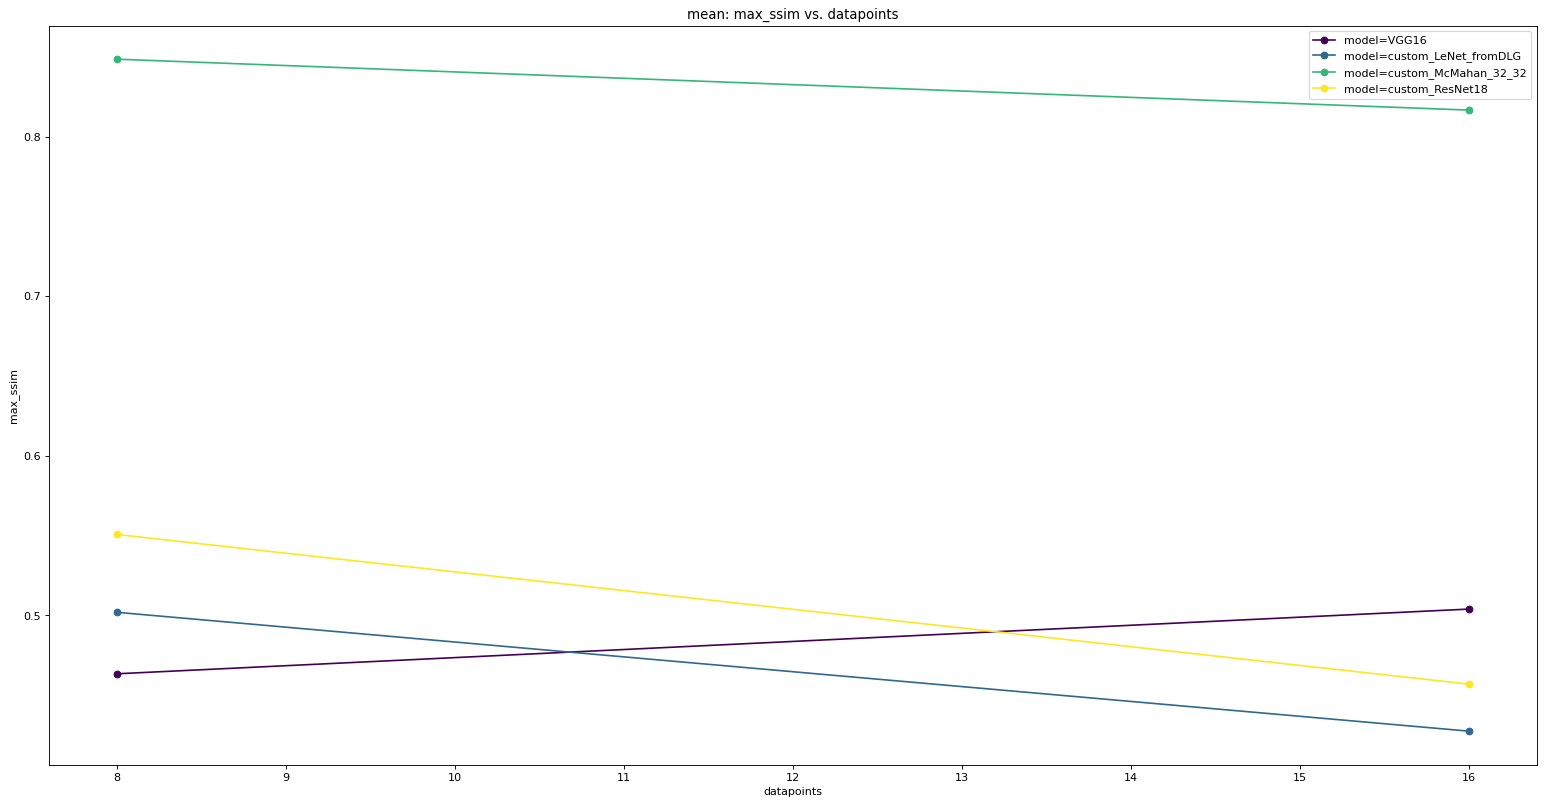

model: ['custom_LeNet_fromDLG' 'VGG16' 'custom_McMahan_32_32' 'custom_ResNet18']
number of total experiment: 37
datapoints(2): [16  8]
['model'](4): ['VGG16' 'custom_LeNet_fromDLG' 'custom_McMahan_32_32' 'custom_ResNet18']
number of experiment for each (datapoints&['model']): 4.625


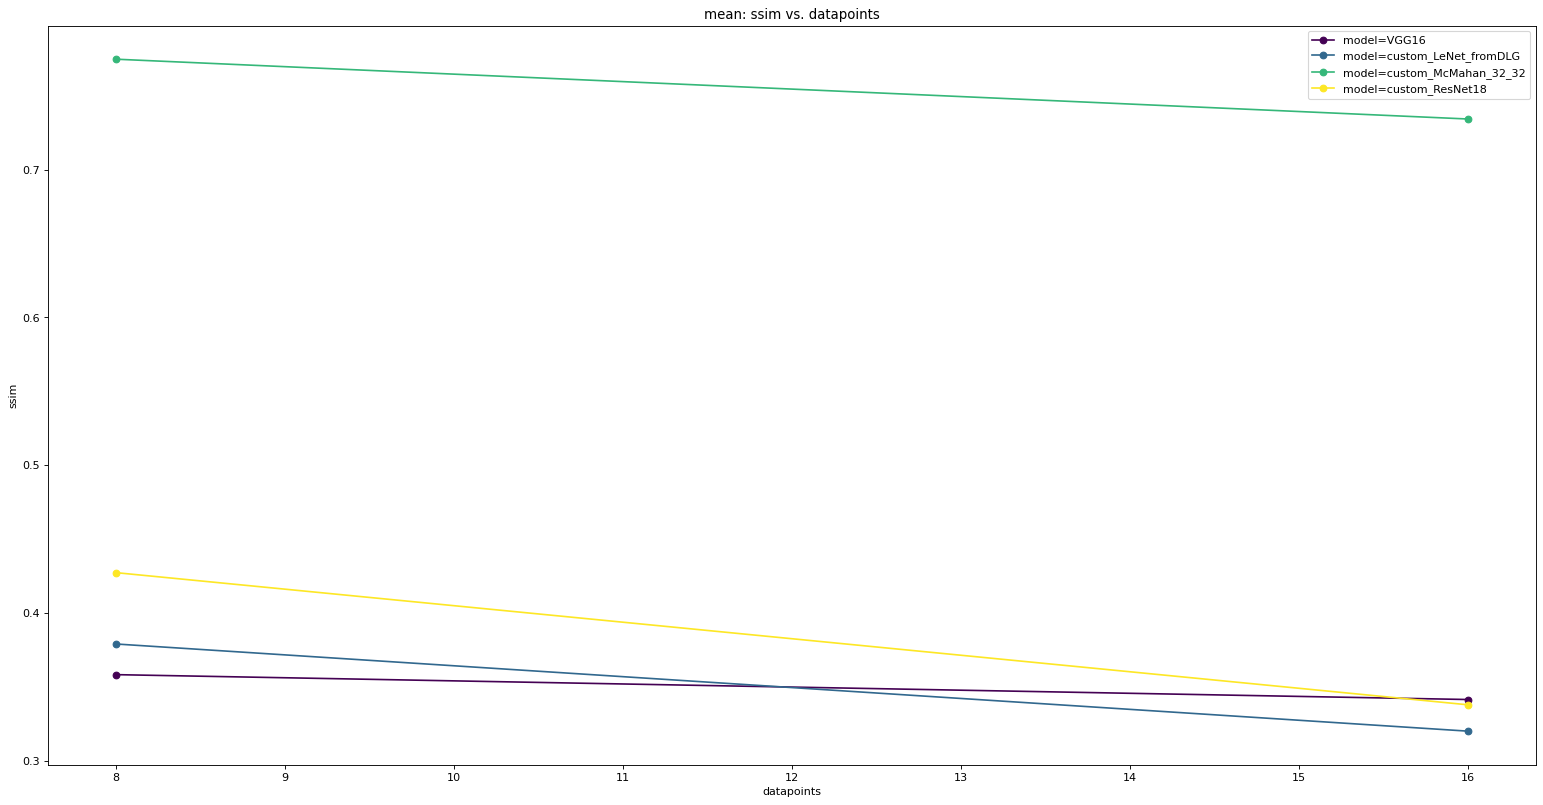

In [12]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df[merged_df["file_path"].str.contains("2023-07-19")]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="datapoints", y_axis=["model"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

[ 50  20 100   0]
(222, 82)
[ 50  20 100  16   8]
['deep-leakage']
model: ['custom_McMahan_32_32']
number of total experiment: 173
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](4): [  1   2   5 100]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 14.416666666666666


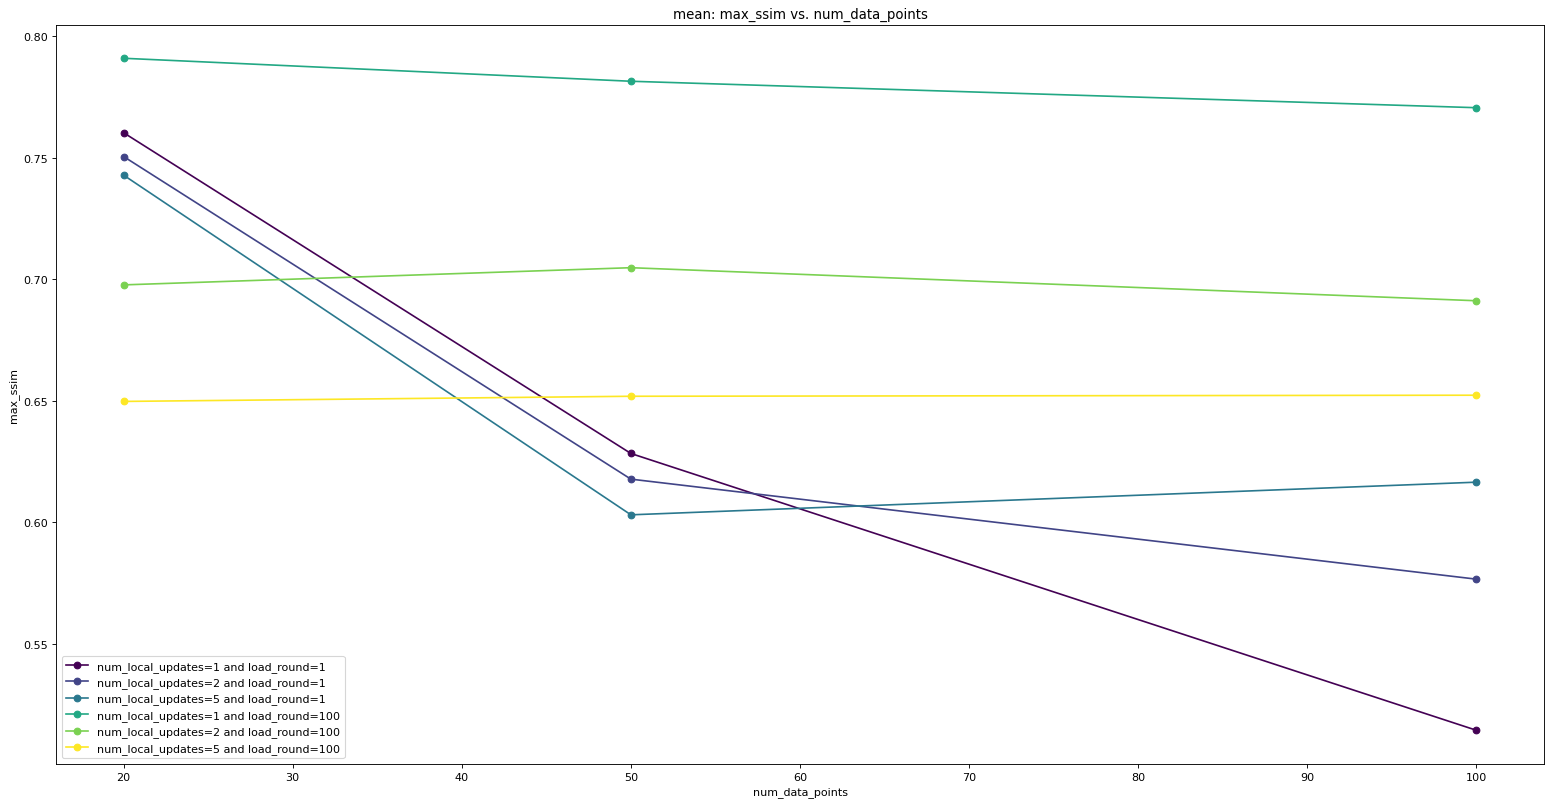

model: ['custom_McMahan_32_32']
number of total experiment: 173
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](4): [  1   2   5 100]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 14.416666666666666


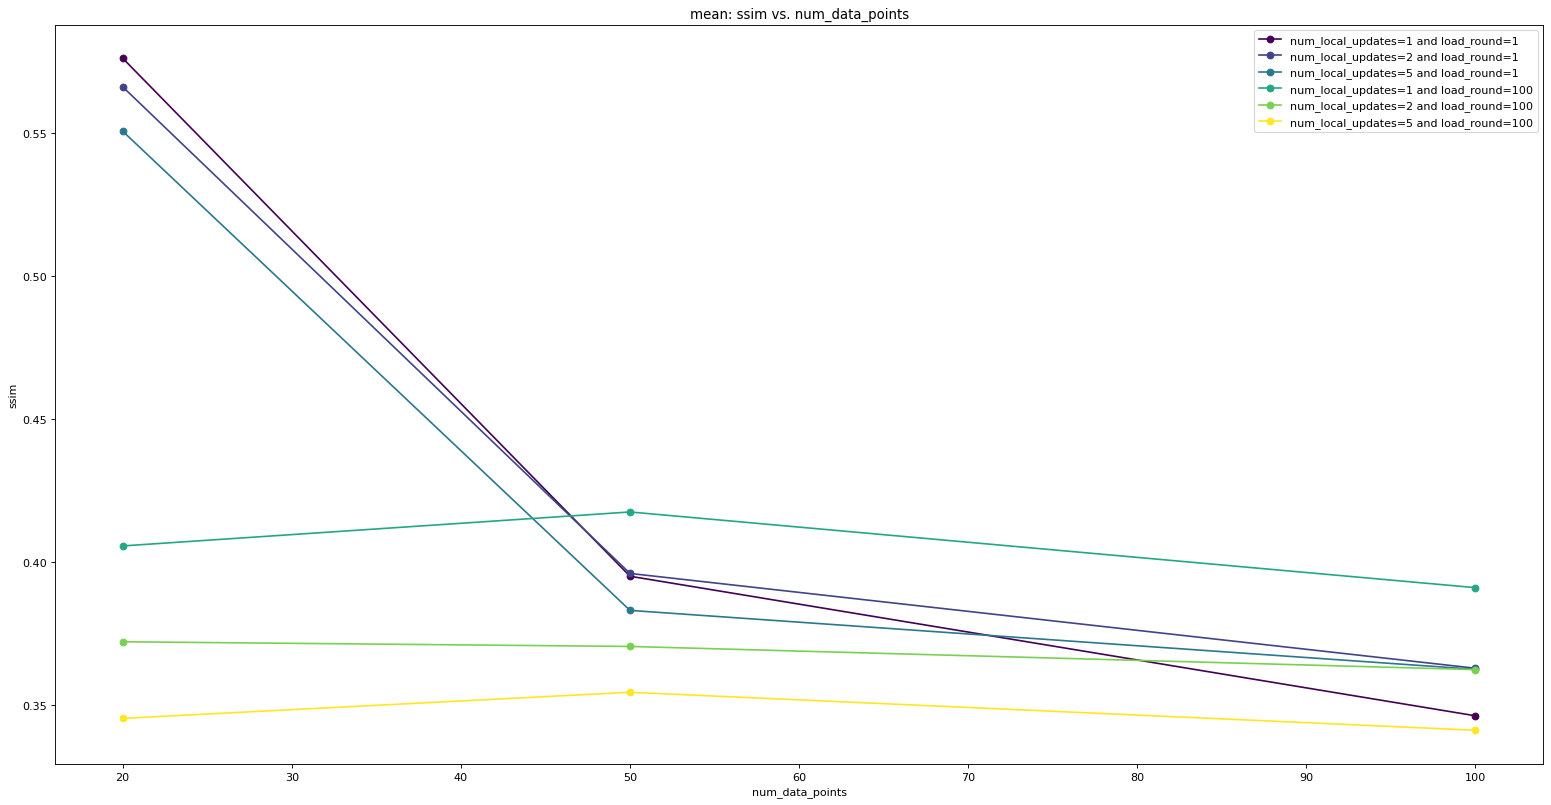

In [8]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df.loc[merged_df["model"] == "custom_McMahan_32_32"]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
filtered_df = filtered_df[(filtered_df["load_round"] == 1) | (filtered_df["load_round"] == 100)]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="num_data_points", y_axis=["num_local_updates", "load_round"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

[ 50  20 100   0]
(222, 81)
[ 50  20 100  16   8]
['deep-leakage']
model: ['custom_McMahan_32_32']
number of total experiment: 25
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](1): [1]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 8.333333333333334


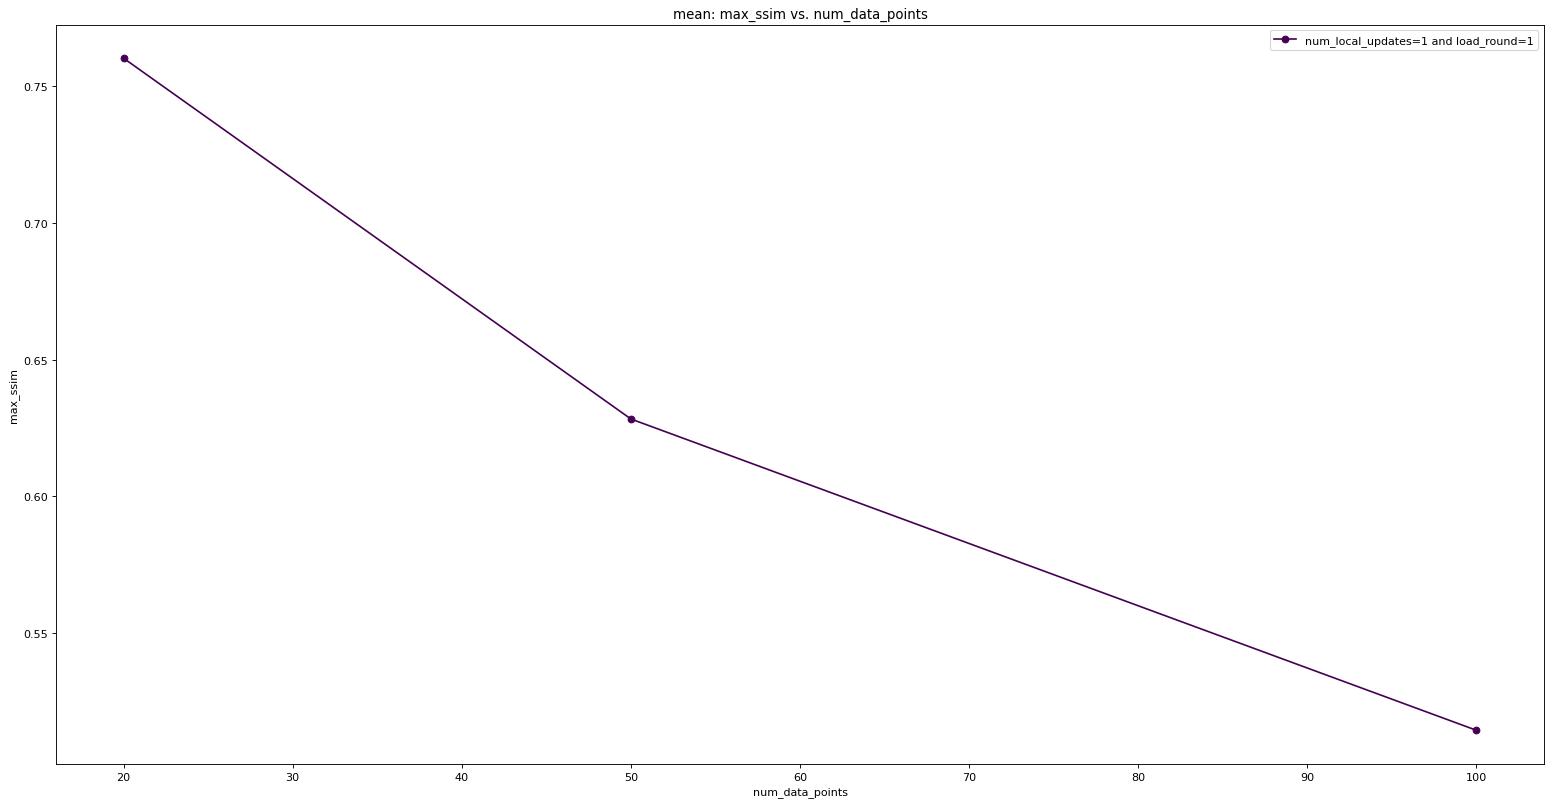

model: ['custom_McMahan_32_32']
number of total experiment: 25
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](1): [1]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 8.333333333333334


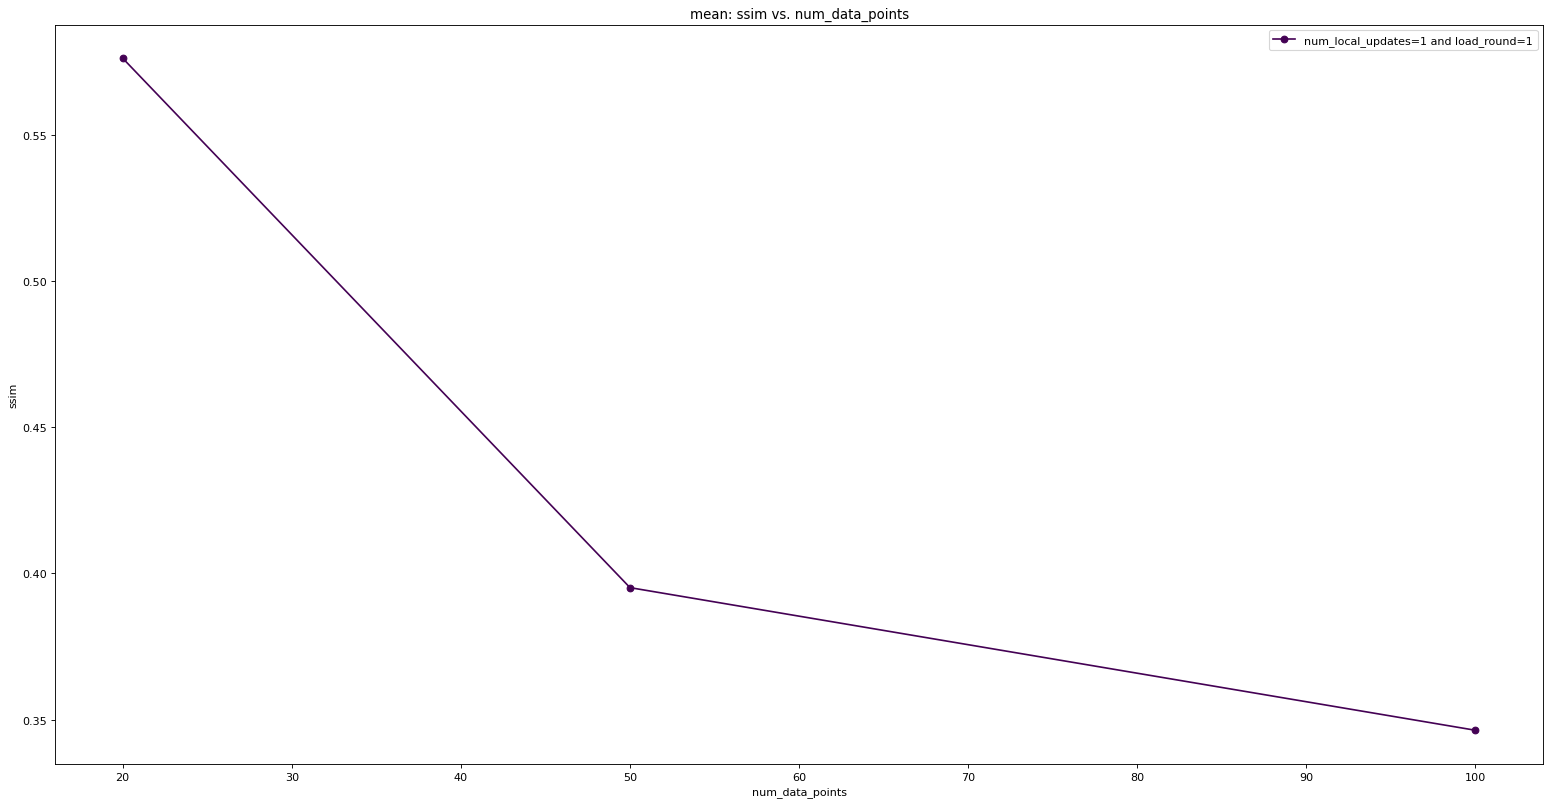

In [13]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df.loc[merged_df["model"] == "custom_McMahan_32_32"]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
filtered_df = filtered_df[(filtered_df["load_round"] == 1)]# | (filtered_df["load_round"] == 100)]
filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="num_data_points", y_axis=["num_local_updates", "load_round"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

In [49]:
x_axis="num_data_points"
y_axis=["num_local_updates", "load_round"]
loss = "mse"
metric = ["mean", "var"]
grouped_df = filtered_df.groupby([x_axis, *y_axis])[loss].agg(metric)
# new_df = df.groupby(x_axis).apply(lambda x: pd.Series({'bc': list(zip(*y_axis))}))
print([np.unique(filtered_df[y_ax]) for y_ax in y_axis])
print([filtered_df[y_ax].unique() for y_ax in y_axis])
keyword_values = np.stack(np.meshgrid(*[np.unique(filtered_df[y_ax]) for y_ax in y_axis]), -1).reshape(-1, len(y_axis))
print(keyword_values)
print(grouped_df.index.get_level_values("num_local_updates"))

[array([1, 2, 5]), array([  1,   5, 100])]
[array([5, 2, 1]), array([  1,   5, 100])]
[[  1   1]
 [  2   1]
 [  5   1]
 [  1   5]
 [  2   5]
 [  5   5]
 [  1 100]
 [  2 100]
 [  5 100]]
Int64Index([1, 1, 1, 2, 2, 2, 5, 5, 5, 1, 1, 1, 2, 2, 2, 5, 5, 5, 1, 1, 1, 2,
            2, 2, 5, 5],
           dtype='int64', name='num_local_updates')


In [4]:
f"{0.23456789:2.4e}"

'2.3457e-01'